In [1]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# 1. 모든 단어 사용

In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, 
                                                         test_split=0.2)

2121728/2110848 [==============================] - 0s 0us/step


훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


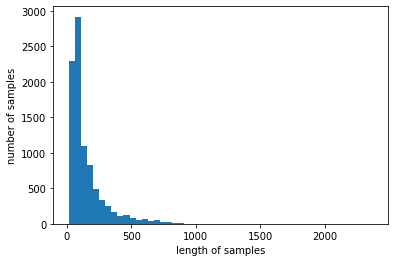

In [3]:
# 데이터 분포 파악
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

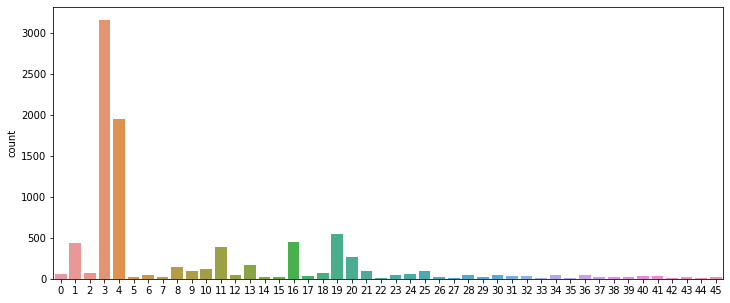

In [4]:
# 타겟데이터 파악
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12, 5)
sns.countplot(y_train)

In [5]:
# 텍스트 데이터로 복원
word_index = reuters.get_word_index(path="reuters_word_index.json")

# 인덱스 +3
index_to_word = {index + 3 : word for word, index in word_index.items()}

# index_to_word에서 숫자 0은 , 숫자 1은 , 숫자 2는  로 설정
for index, token in enumerate(("", "", "")):
    index_to_word[index] = token

565248/550378 [==============================] - 0s 0us/step


In [6]:
# 전체 학습데이터 복원
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)
    
x_train = decoded

In [7]:
# 전체 테스트데이터 복원
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)
    
x_test = decoded

In [8]:
# DTM 확인
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

# 테스트 데이터
x_test_dtm = dtmvector.transform(x_test)  # 테스트 데이터를 DTM 으로 변환

(8982, 26504)


In [9]:

# TF-IDF Matrix 확인
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

# 테스트 데이터
tfidfv_test = tfidf_transformer.transform(x_test_dtm)  # DTM을 TF-ODF 행렬로 변환

(8982, 26504)


모델별 정확도 예측

In [10]:
# 결과값 비교를 위한 리스트 선언
classifier_list = ["MultinomialNB", "ComplementNB", "Logistic Regression", "LinearSVC", "Decision Tree", "Random Forest", "GradientBoostingClassifier", "Voting"]
classifier_answer_list = []

나이브 베이즈 분류기

In [11]:
mod = MultinomialNB()
mod.fit(tfidfv, y_train)

predicted = mod.predict(tfidfv_test)  # 테스트 데이터에 대한 예측
print("정확도 :", accuracy_score(y_test, predicted))  # 예측값과 실제값 비교

classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도 : 0.5997328584149599


Complement Naive Bayes Classifier(CNB)

In [12]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

predicted = cb.predict(tfidfv_test)
print("정확도 :", accuracy_score(y_test, predicted))

classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도 : 0.7649154051647373


로지스틱 회귀

In [13]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

predicted = lr.predict(tfidfv_test)
print("정확도 :", accuracy_score(y_test, predicted))

classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도 : 0.8125556544968834


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



선형 서포트 벡터 머신

In [14]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

predicted = lsvc.predict(tfidfv_test)
print("정확도 :", accuracy_score(y_test, predicted))

classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도 : 0.7782724844167409


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


결정 트리

In [15]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

predicted = tree.predict(tfidfv_test)
print("정확도 :", accuracy_score(y_test, predicted))

classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도 : 0.6219946571682992


랜덤 포레스트


In [16]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

predicted = forest.predict(tfidfv_test)
print("정확도 :", accuracy_score(y_test, predicted))

classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도 : 0.6607301869991096


그래디언트 부스팅 트리

In [17]:
grbt = GradientBoostingClassifier(random_state=0)
grbt.fit(tfidfv, y_train)

predicted = grbt.predict(tfidfv_test)
print("정확도 :", accuracy_score(y_test, predicted))

classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도 : 0.769813000890472


보팅(로지스틱 회귀, CNB, 그래디언트 부스팅 트리 세 가지 사용)

In [18]:
voting_classifier = VotingClassifier(estimators=[
    ('lr', LogisticRegression(C=10000, penalty='l2')),
    ('cb', ComplementNB()),
    ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

predicted = voting_classifier.predict(tfidfv_test)
print("정확도 :", accuracy_score(y_test, predicted))

classifier_answer_list.append(accuracy_score(y_test, predicted))

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


정확도 : 0.8192341941228851


전체 결과 & f1 score

In [19]:
# 전체 결과 비교

print("빈도수 제한없을 때 정확도 리스트\n")

for x in range(len(classifier_list)):
    print(classifier_list[x], ":", classifier_answer_list[x].round(2))

빈도수 제한없을 때 정확도 리스트

MultinomialNB : 0.6
ComplementNB : 0.76
Logistic Regression : 0.81
LinearSVC : 0.78
Decision Tree : 0.62
Random Forest : 0.66
GradientBoostingClassifier : 0.77
Voting : 0.82


In [20]:
# f1 score 알아보기
#from sklearn.metrics import f1_score

predicted = voting_classifier.predict(tfidfv_test)
# print("f1 score :", f1_score(y_test, predicted, average='micro'))
print("f1 score :", classification_report(y_test, predicted, zero_division=0))

f1 score :               precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.78      0.77      0.78       105
           2       0.64      0.80      0.71        20
           3       0.93      0.93      0.93       813
           4       0.82      0.88      0.85       474
           5       1.00      0.20      0.33         5
           6       0.86      0.86      0.86        14
           7       1.00      0.67      0.80         3
           8       0.73      0.71      0.72        38
           9       0.80      0.80      0.80        25
          10       0.90      0.90      0.90        30
          11       0.68      0.72      0.70        83
          12       0.50      0.46      0.48        13
          13       0.69      0.65      0.67        37
          14       0.33      1.00      0.50         2
          15       0.40      0.22      0.29         9
          16       0.75      0.77      0.76        99
          17    


4. 딥러닝 모델과 비교

In [23]:

from tensorflow import keras
import numpy as np

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000, 
                                                                         test_split=0.2)

print(train_data.shape, train_labels.shape)

(8982,) (8982,)


In [24]:

print(test_data.shape, test_labels.shape)

(2246,) (2246,)


In [25]:
from keras.utils.np_utils import to_categorical

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# 원핫인코딩을 해줍시다
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [26]:
model = keras.Sequential()

model.add(keras.layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(keras.layers.Dense(64, activation='relu')) 
model.add(keras.layers.Dense(46, activation='softmax'))  # 클래스가 46개

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640064    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [27]:
# 모델 컴파일 설정
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 데이터 나누기
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [28]:
history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=20, 
                    batch_size=512, 
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 11s 60ms/step - loss: 3.2841 - accuracy: 0.3561 - val_loss: 2.4946 - val_accuracy: 0.5110
Epoch 2/20
16/16 [==============================] - 0s 12ms/step - loss: 1.9625 - accuracy: 0.5775 - val_loss: 1.6291 - val_accuracy: 0.6260
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 1.3379 - accuracy: 0.7110 - val_loss: 1.2950 - val_accuracy: 0.7180
Epoch 4/20
16/16 [==============================] - 0s 12ms/step - loss: 1.0085 - accuracy: 0.7839 - val_loss: 1.1333 - val_accuracy: 0.7650
Epoch 5/20
16/16 [==============================] - 0s 12ms/step - loss: 0.7890 - accuracy: 0.8349 - val_loss: 1.0394 - val_accuracy: 0.7830
Epoch 6/20
16/16 [==============================] - 0s 12ms/step - loss: 0.6175 - accuracy: 0.8706 - val_loss: 0.9699 - val_accuracy: 0.8080
Epoch 7/20
16/16 [==============================] - 0s 12ms/step - loss: 0.4840 - accuracy: 0.9007 - val_loss: 0.9409 - val_accuracy: 0.8110
Epoch 8/20
1

In [29]:
# 모델 평가
model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 3ms/step - loss: 1.1127 - accuracy: 0.7952


[1.1127303838729858, 0.7951914668083191]

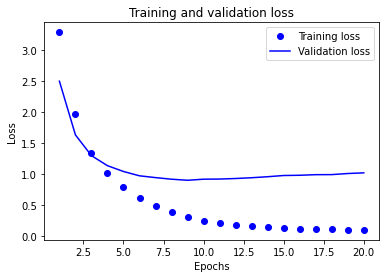

In [30]:
# 시각화
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()